This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

* sex (1 = male; 0 = female)
* trestbps = resting blood pressure (in mm Hg on admission to the hospital)
* chol = serum cholestoral in mg/dl
* 
f = s
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = fal
* 
restec = 
resting electrocardiographic resul
* thalach = 
maximum heart rate achieve
* exang = exercise induced angina (1 = yes; 0 = no)
* oldpeak = 
ST depression induced by exercise relative to restdtsse)

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [100]:
original_df = pd.read_csv("Heart1.csv")
df = original_df.copy()

In [101]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [103]:
df.shape

(303, 14)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [105]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [106]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* The mean age is 54.43
* 

In [107]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [109]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [110]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

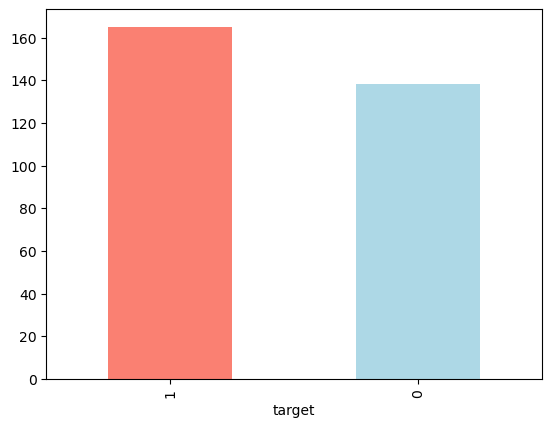

In [111]:
df.target.value_counts().plot(kind='bar', color=["salmon", "lightblue"]);

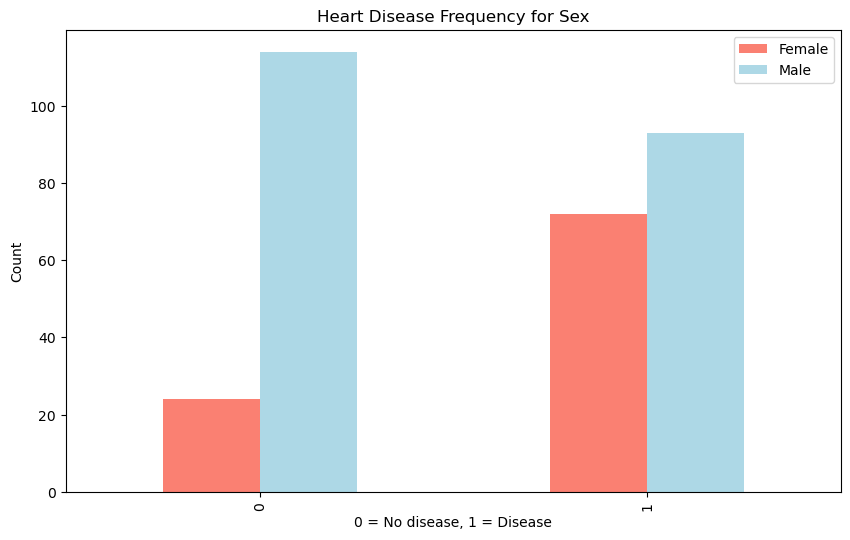

In [112]:
pd.crosstab(df.target, df.sex).plot(kind='bar',figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])

Comparatively, more number of males than females do not have heart disease but again the number of male are greater than female

Text(0, 0.5, 'Max Heart Rate')

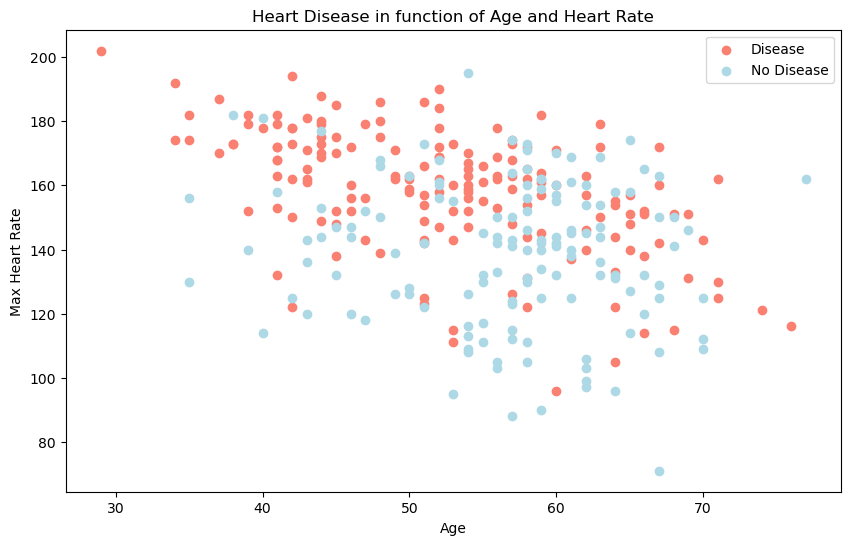

In [113]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

plt.title("Heart Disease in function of Age and Heart Rate")
plt.legend(["Disease","No Disease"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")


It can be observed that the more the age , the more is the chance of getting heart disease

<Axes: ylabel='Frequency'>

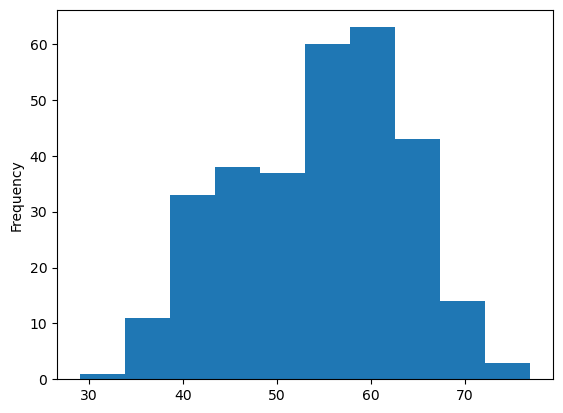

In [114]:
df.age.plot.hist()

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [115]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 0, 'Chest Pain Type')

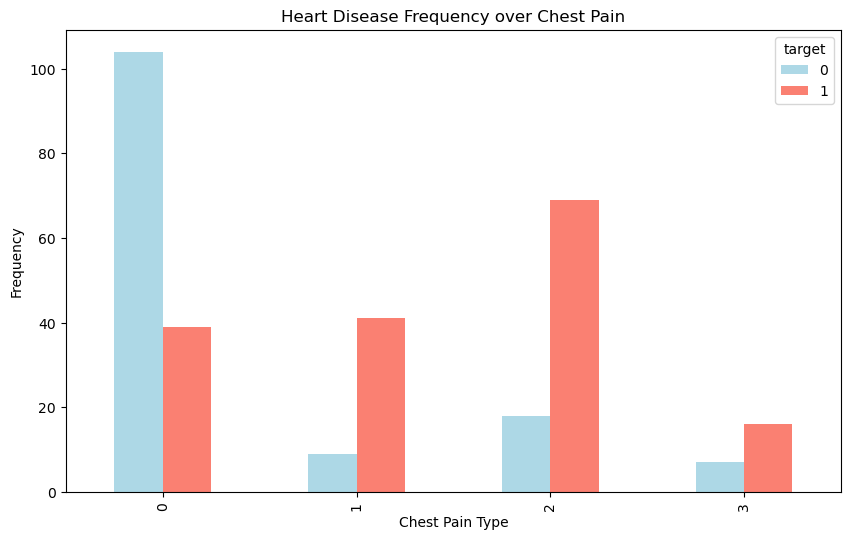

In [116]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["lightblue","salmon"])
plt.title("Heart Disease Frequency over Chest Pain")
plt.ylabel("Frequency")
plt.xlabel("Chest Pain Type")

It can be observed that person with chest pain type 2 is most likely have heart disease

# Modelling

In [117]:
X = df.drop("target",axis=1)
y = df.target.values

In [118]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [119]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [120]:
y_train

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [121]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [122]:
models = {"Logistic Regression": LogisticRegression(),
        "KNeighbors Classifier": KNeighborsClassifier(),
         "RandomForest Classifier": RandomForestClassifier()}

def fit_test(models, X_train , y_train , X_test , y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        accuracy = model.score(X_test,y_test)
        y_pred = model.predict(X_test)
        precision = precision_score(y_test,y_pred,average="binary")
        recall = recall_score(y_test,y_pred,average='binary')
        f1 = f1_score(y_test,y_pred,average='binary')
        model_scores[name] = {'Accuracy':accuracy,
                              'Precision':precision,
                              'Recall':recall,
                              'F1_Score':f1}
    return model_scores


In [123]:
model_scores = fit_test(models,X_train,y_train,X_test,y_test)
model_scores

C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'Accuracy': 0.819672131147541,
  'Precision': 0.8292682926829268,
  'Recall': 0.8947368421052632,
  'F1_Score': 0.8607594936708861},
 'KNeighbors Classifier': {'Accuracy': 0.6557377049180327,
  'Precision': 0.717948717948718,
  'Recall': 0.7368421052631579,
  'F1_Score': 0.7272727272727273},
 'RandomForest Classifier': {'Accuracy': 0.7377049180327869,
  'Precision': 0.775,
  'Recall': 0.8157894736842105,
  'F1_Score': 0.7948717948717948}}

# Model comparision

In [124]:
model_compare = pd.DataFrame(model_scores)
model_compare

,Logistic Regression,KNeighbors Classifier,RandomForest Classifier
Accuracy,0.819672,0.655738,0.737705
Precision,0.829268,0.717949,0.775000
Recall,0.894737,0.736842,0.815789
F1_Score,0.860759,0.727273,0.794872


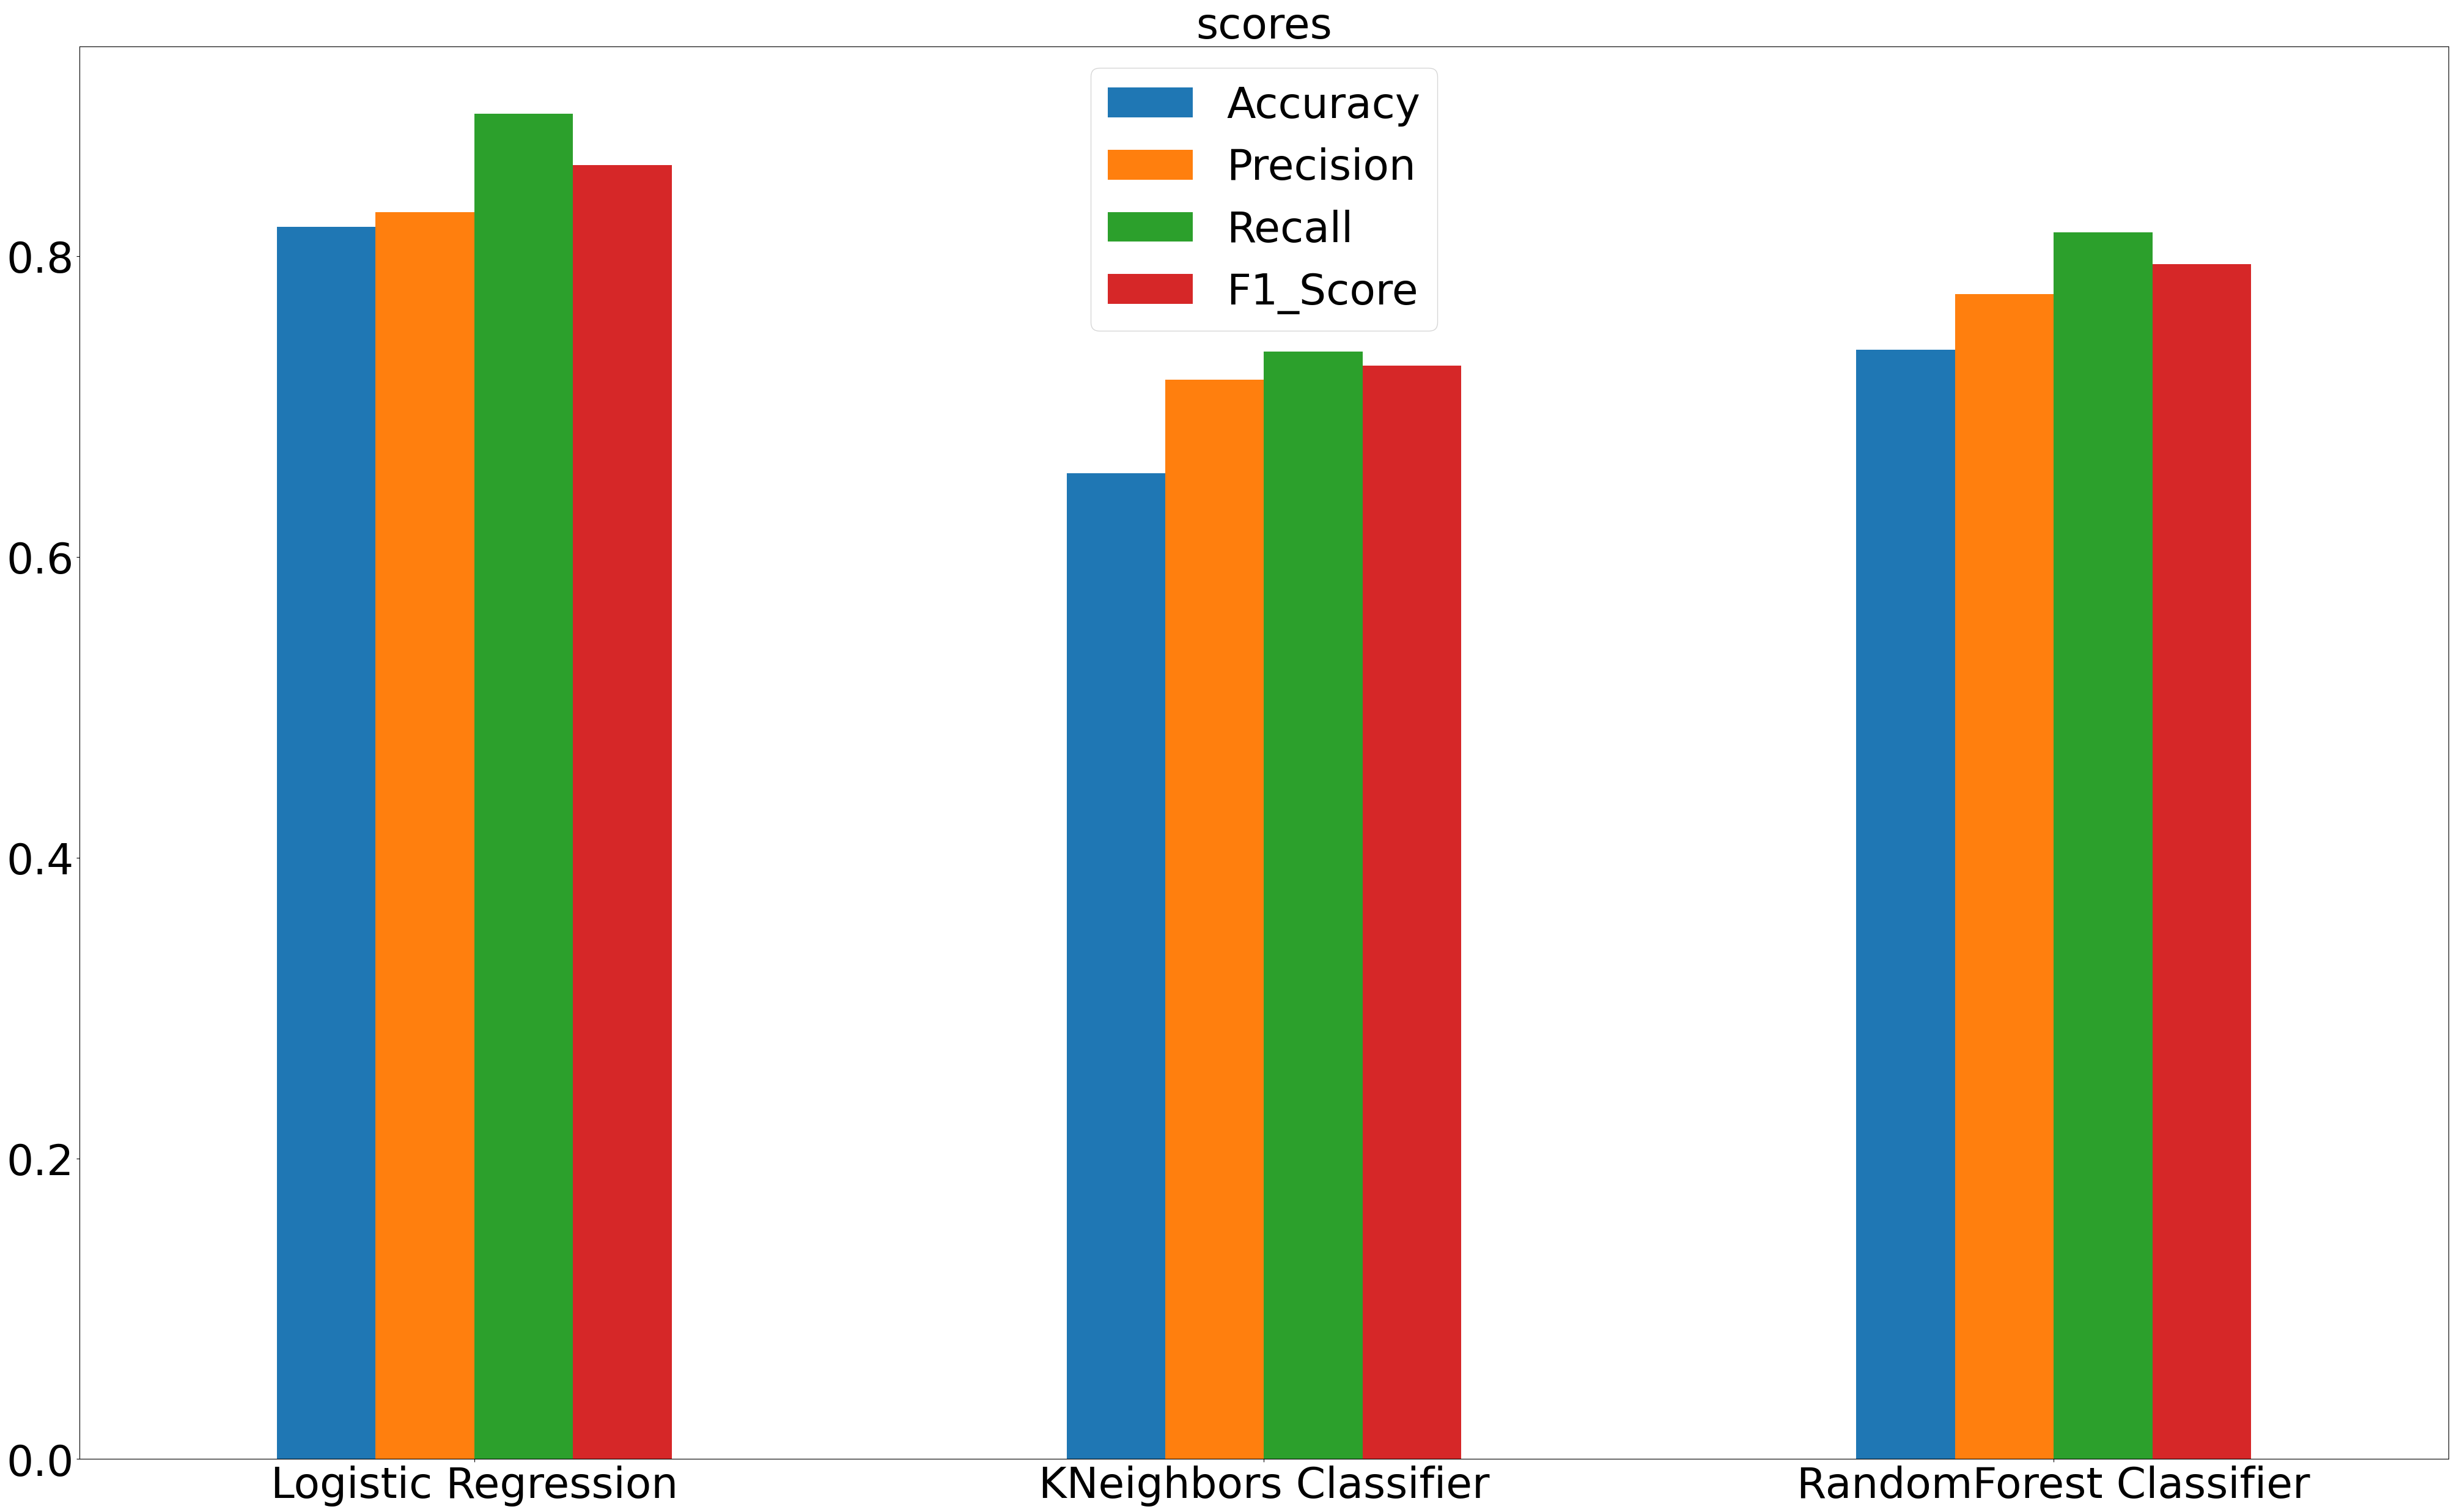

In [125]:
#plt.figure(figsize=(150,150))
ax= model_compare.T.plot(kind='bar', figsize=(50, 30), fontsize=50)
ax.set_title("scores",fontsize=50)
plt.xticks(rotation=360)
ax.legend(loc='best',fontsize=50)

In [126]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean CV Score: ", scores.mean())

Cross-Validation Scores:  [0.83606557 0.8852459  0.83606557 0.8        0.75      ]
Mean CV Score:  0.8214754098360656


## Cross-Validation

In [127]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean CV Score: ", scores.mean())

Cross-Validation Scores:  [0.83606557 0.86885246 0.85245902 0.85       0.75      ]
Mean CV Score:  0.8314754098360655


C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [128]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean CV Score: ", scores.mean())

Cross-Validation Scores:  [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean CV Score:  0.643879781420765


In [129]:
models = {"Logistic Regression": LogisticRegression(),
          "KNeighbors Classifier": KNeighborsClassifier(),
         "RandomForest Classifier": RandomForestClassifier()}

def fit_cross_scores(models, X,y):
    np.random.seed(12)
    model_cross_scores = {}
    for name,model in models.items():
        scores = cross_val_score(model,X,y,cv=5)
        model_cross_scores[name] = scores.mean()
    return model_cross_scores


In [130]:
model_cross_scores = fit_cross_scores(models,X,y)
model_cross_scores

C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'Logistic Regression': 0.8314754098360655,
 'KNeighbors Classifier': 0.643879781420765,
 'RandomForest Classifier': 0.8084153005464481}

In [131]:
cross_scores = pd.DataFrame(model_cross_scores,index=['accuracy'])
cross_scores

,Logistic Regression,KNeighbors Classifier,RandomForest Classifier
accuracy,0.831475,0.64388,0.808415


Text(0.5, 1.0, 'Cross Val Scores')

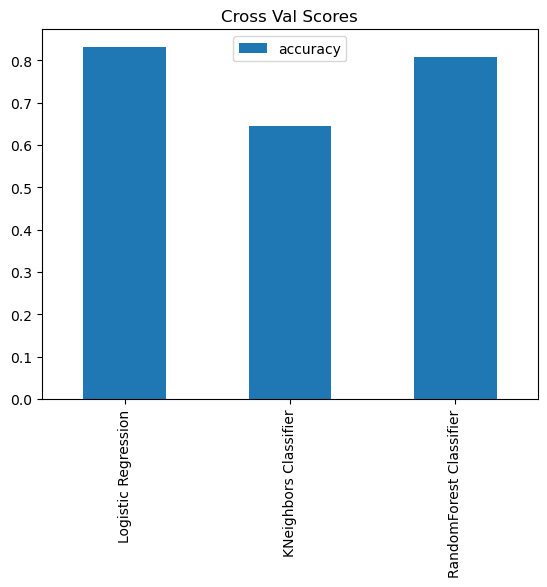

In [132]:
cross_scores.T.plot.bar()
plt.title("Cross Val Scores")

It is seen that Logistic Regression is performing better than others.

## HyperParameter Tuning

In [133]:
log_reg_grid = {'C':np.logspace(-4,4,20),
               "solver":["liblinear"]}

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=1000,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 20 is smaller than n_iter=1000. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=1000,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [134]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [135]:
rs_log_reg.score(X_test,y_test)

0.8032786885245902

In [136]:
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [137]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [138]:
rs_rf.score(X_test,y_test)

0.8032786885245902

## Hyperparameter Tuning with GridSearchCV

In [139]:
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [140]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [141]:
gs_log_reg.score(X_test,y_test)

0.8032786885245902

In [142]:
param_grid={
    "C":np.logspace(-4,4,100),
    'penalty':['l1','l2','elasticnet','none'],
    'solver':['saga','liblinear','newton-cg','lbfgs','sag'],
    'max_iter':[100,1000,2500,5000]
}
log_reg = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(log_reg,param_grid,cv=3,scoring='accuracy',n_jobs=-1,verbose=True)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8000 candidates, totalling 24000 fits


C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15600 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    so

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03...
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga', 'liblinear', 'newton-cg', 'lbfgs',
                                    'sag']},
             scoring='accuracy', verbose=True)

In [143]:
grid_search.best_params_

{'C': 5.857020818056673, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [144]:
grid_search.score(X_test,y_test)

0.8032786885245902

Unable the enhance the model

In [145]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean CV Score: ", scores.mean())

Cross-Validation Scores:  [0.83606557 0.86885246 0.85245902 0.85       0.75      ]
Mean CV Score:  0.8314754098360655


C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [146]:
best_model = LogisticRegression()
best_model.fit(X_train,y_train)
best_model.score(X_test,y_test)

C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.819672131147541

In [147]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the subsample sizes
subsample_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize results dictionary
subsample_results = {}

# Perform subsample analysis
for subsample_size in subsample_sizes:
    sss = StratifiedShuffleSplit(n_splits=5, test_size=subsample_size, random_state=42)
    subsample_accuracies = []
    for train_index, test_index in sss.split(X, y):
        best_model.fit(X_train, y_train)
        accuracy = best_model.score(X_test, y_test)
        subsample_accuracies.append(accuracy)
    subsample_results[subsample_size] = np.mean(subsample_accuracies)

print("Subsample analysis results:", subsample_results)


C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Subsample analysis results: {0.1: 0.8196721311475411, 0.2: 0.8196721311475411, 0.3: 0.8196721311475411, 0.4: 0.8196721311475411, 0.5: 0.8196721311475411}


C:\Users\DELL\phase2\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
